In [5]:
import pandas as pd

# Load the Excel file
file_path = 'fit_scores_experiments.xlsx'
df = pd.read_excel(file_path)

# Function to extract the "fittest" scores from each column
def extract_fittest_scores(column):
    return column.str.extract(r'fittest: (\d+\.?\d*)')[0]

# Apply the function to all columns
fittest_scores_df = df.apply(extract_fittest_scores)

# Display the results
print(fittest_scores_df.head())

  movement_towards_mountain lower_geneCountof1_popSize5  \
0                      0.27                       0.047   
1                      0.27                       0.049   
2                      0.27                       0.049   
3                      0.27                       0.049   
4                      0.27                       0.049   

  higher_geneCountof5_popSize5 10_popsize_geneCountof5  \
0                        0.301                   0.155   
1                        0.301                   0.649   
2                        0.965                   0.649   
3                        0.965                   0.649   
4                        0.965                   0.649   

  15_popsize_geneCountof5 pop20_gene5 pop20_gene5_linkLength0.5  \
0                   0.622       0.113                     0.231   
1                   0.622       0.677                     0.231   
2                   0.858       0.677                     1.231   
3                   0.858   

In [18]:
import pandas as pd

# Load the Excel file
file_path = 'fit_scores_experiments.xlsx'
df = pd.read_excel(file_path)

# Function to extract the "fittest" scores from each column
def extract_fittest_scores(column):
    return column.str.extract(r'fittest: (\d+\.?\d*)')[0]

# Apply the function to all columns
fittest_scores_df = df.apply(extract_fittest_scores)

# Get the last 5 values for each column
last_5_fittest_scores_df = fittest_scores_df.apply(lambda col: col.dropna().tail(5))

# Display the results
print(last_5_fittest_scores_df)


   movement_towards_mountain lower_geneCountof1_popSize5  \
45                     2.586                       0.507   
46                     2.586                       0.507   
47                     2.586                       0.507   
48                     2.586                       0.507   
49                     2.586                       0.507   

   higher_geneCountof5_popSize5 10_popsize_geneCountof5  \
45                        1.095                   1.107   
46                        1.095                   1.107   
47                        1.095                   1.107   
48                        1.095                   1.111   
49                        1.095                   1.111   

   15_popsize_geneCountof5 pop20_gene5 pop20_gene5_linkLength0.5  \
45                   1.108       1.224                     1.324   
46                   1.108       1.224                     1.324   
47                   1.378       1.224                     1.324   
48          

<Figure size 1500x1000 with 0 Axes>

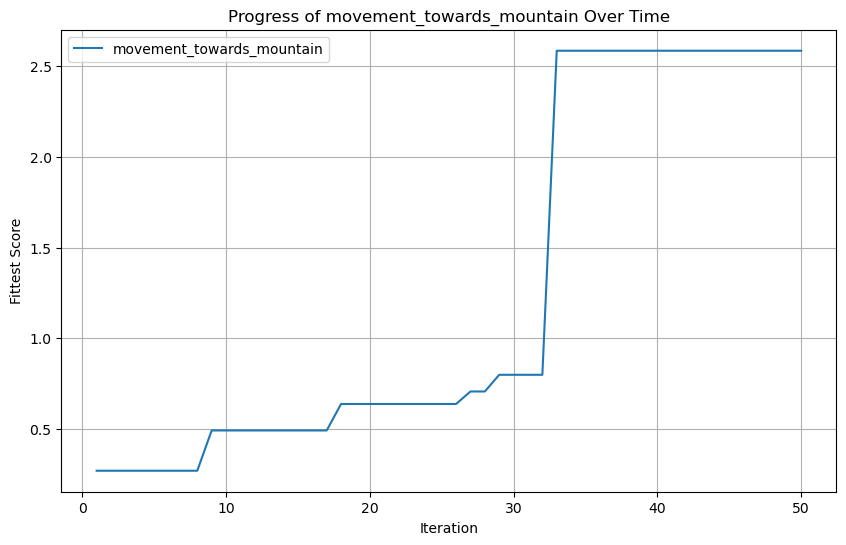

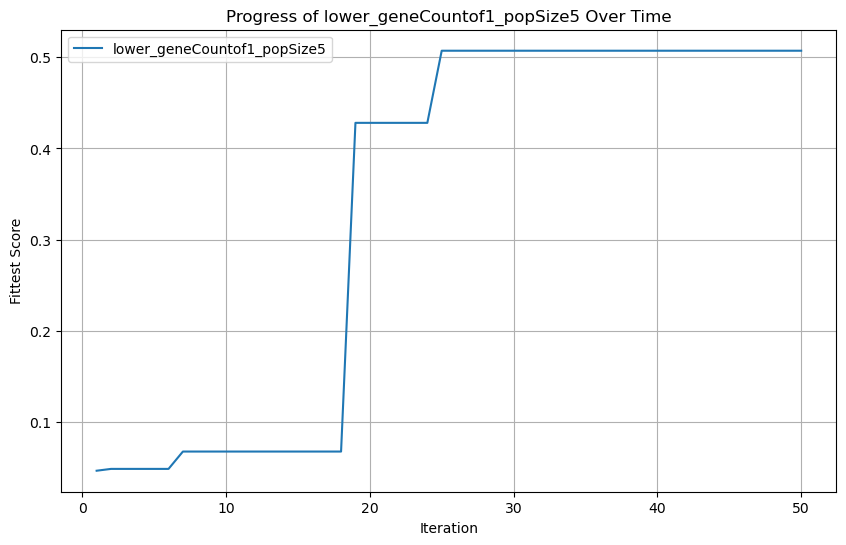

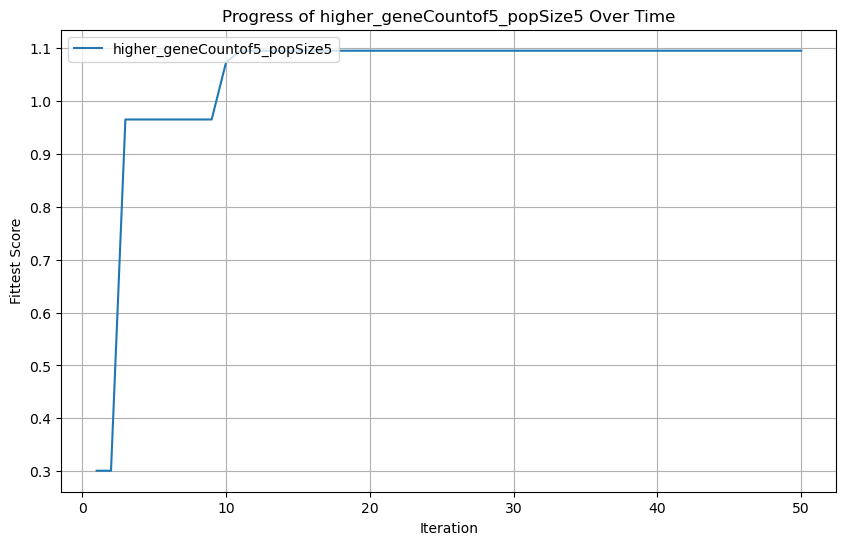

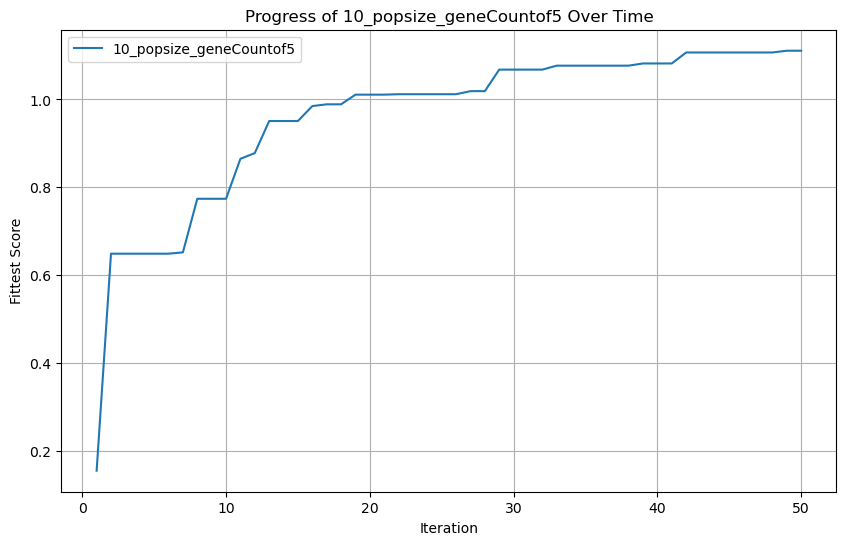

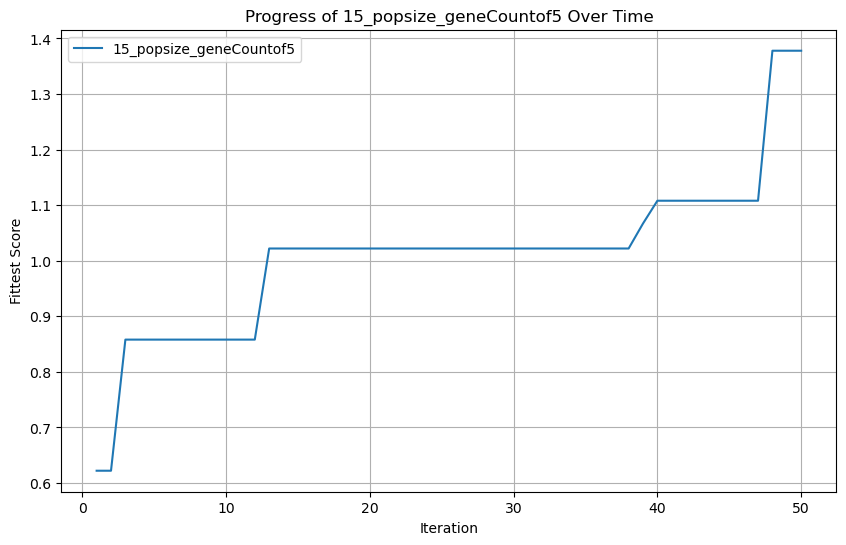

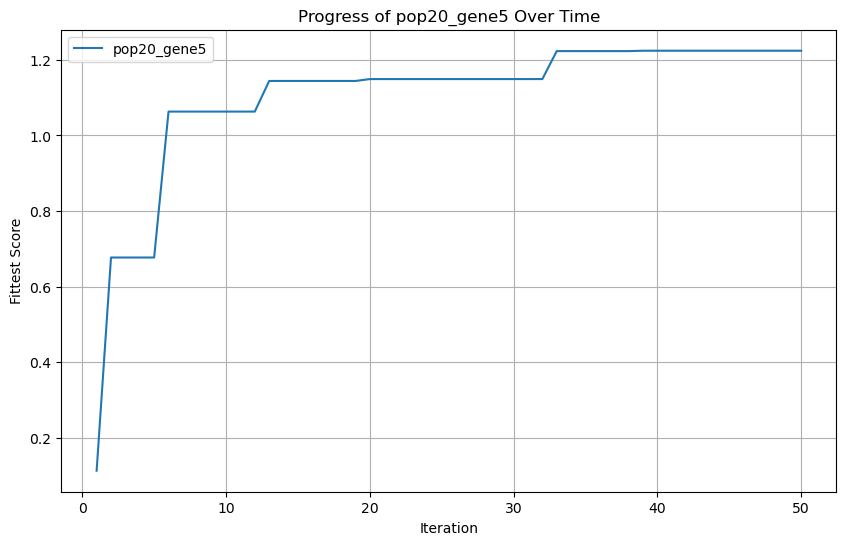

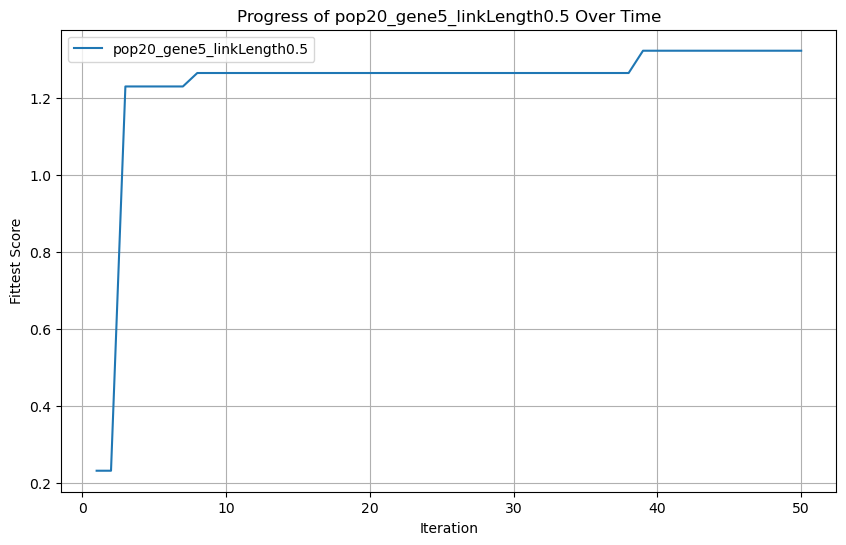

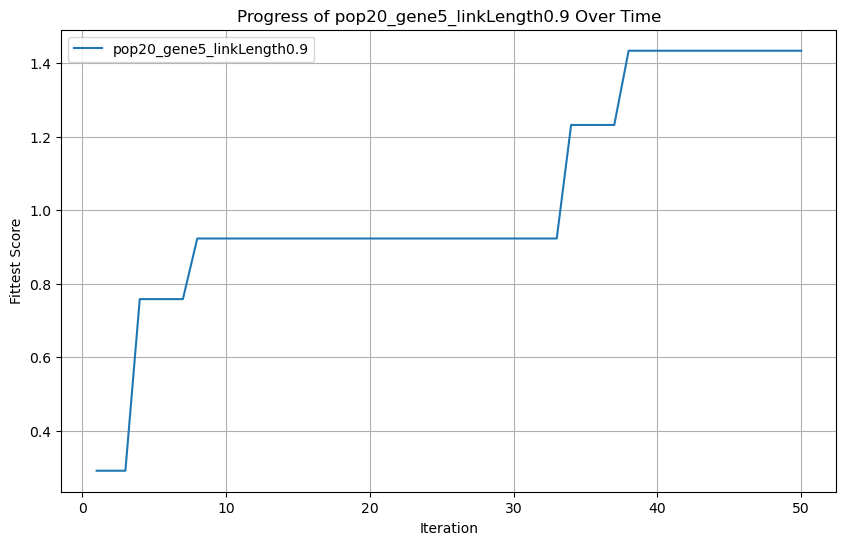

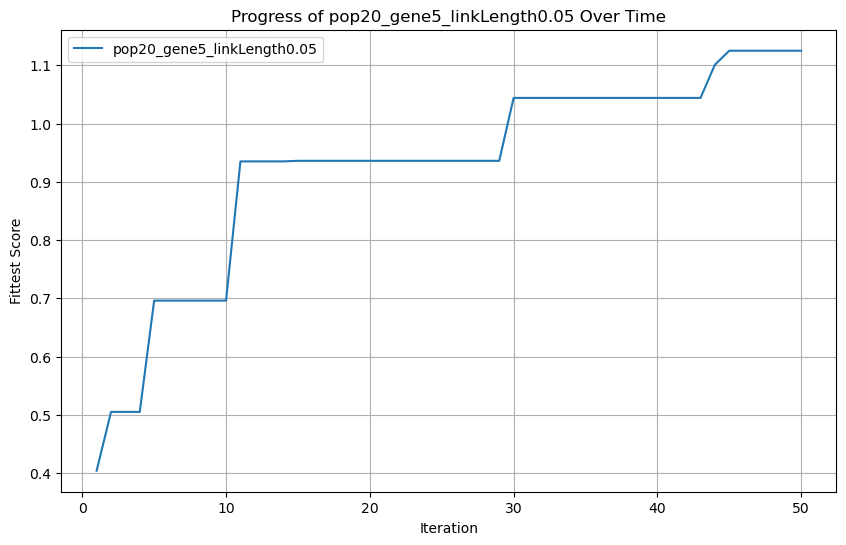

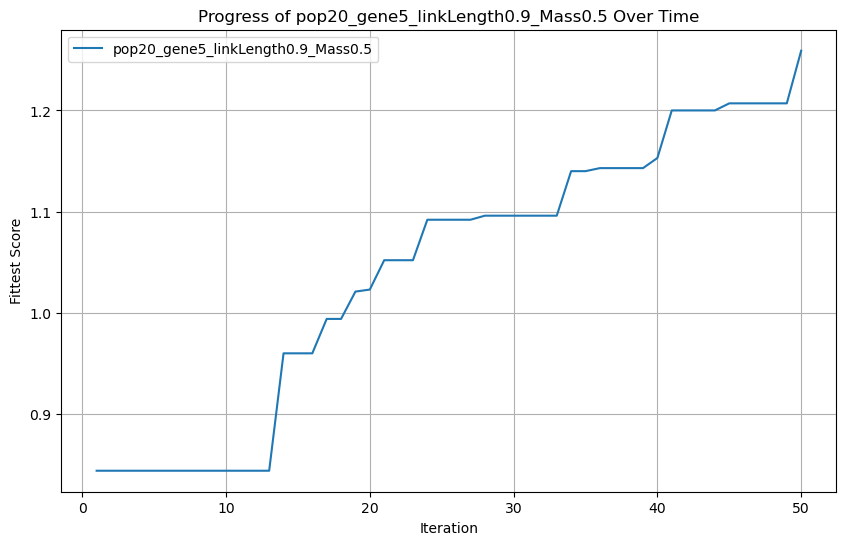

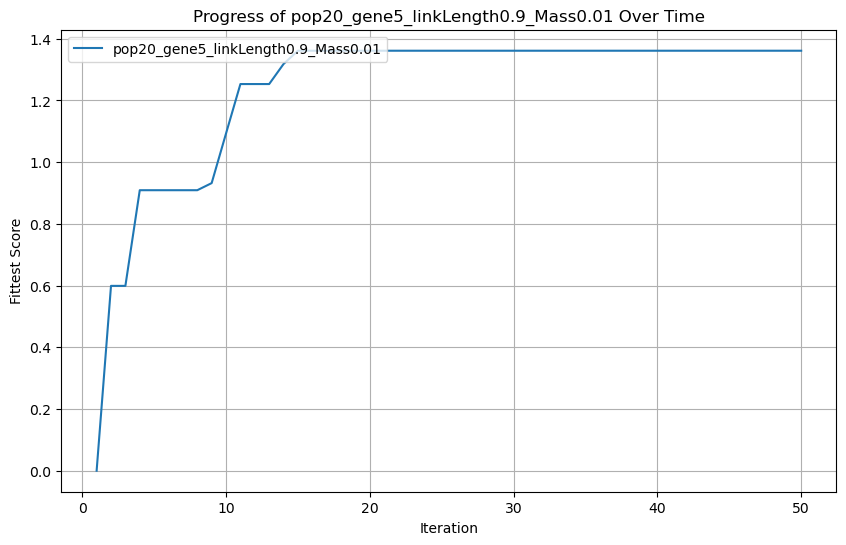

In [11]:
import matplotlib.pyplot as plt

# Set the index to represent the iteration number
fittest_scores_df.index = range(1, len(df) + 1)

# Plot the progress of each experiment
plt.figure(figsize=(15, 10))

for column in fittest_scores_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(fittest_scores_df.index, fittest_scores_df[column].astype(float), label=column)
    plt.xlabel('Iteration')
    plt.ylabel('Fittest Score')
    plt.title(f'Progress of {column} Over Time')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.savefig(f'{column}_progress.jpg')
    plt.show()

# plt.xlabel('Iteration')
# plt.ylabel('Fittest Score')
# plt.title('Progress of Each Experiment Over Time')
# plt.legend(loc='upper left')
# plt.grid(True)
# plt.show()

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Define the base directory containing the gene specification files
base_directory = '/Users/marcus/Desktop/Y3/Y3S2/AI/AI MidTerms/scripts'

# Define the experiment names
experiment_names = [
    "movement_towards_mountain", "lower_geneCountof1_popSize5", "higher_geneCountof5_popSize5",
    "10_popsize_geneCountof5", "15_popsize_geneCountof5", "20_popsize_geneCountof5", "pop20_gene5_linkLength0.5",
    "pop20_gene5_linkLength0.9", "pop20_gene5_linkLength0.05", "pop20_gene5_linkLength0.9_Mass0.5",
    "pop20_gene5_linkLength0.9_Mass0.01"
]

# Define the headers for the CSV files
headers = [
    'link-shape', 'link-length', 'link-radius', 'link-recurrence', 'link-mass', 'joint-type', 
    'joint-parent', 'joint-axis-xyz', 'joint-origin-rpy-1', 'joint-origin-rpy-2', 'joint-origin-rpy-3', 
    'joint-origin-xyz-1', 'joint-origin-xyz-2', 'joint-origin-xyz-3', 'control-waveform', 'control-amp', 'control-freq', 'blank'
]

# Function to extract gene data from a file
def extract_gene_data(file_path):
    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        return None
    
    # Read the file without headers
    df = pd.read_csv(file_path, header=None)
    
    # Assign headers manually
    df.columns = headers[:len(df.columns)]
    
    return df

# Iterate over each experiment and plot the gene data
for experiment in experiment_names:
    experiment_directory = os.path.join(base_directory, experiment)
    
    # Dictionary to hold the link-length data for all iterations
    iteration_data = {}

    for i in range(50):
        file_path = os.path.join(experiment_directory, f'elite_{i}.csv')
        gene_data = extract_gene_data(file_path)
        
        if gene_data is not None:
            # Check if 'link-length' is a valid column
            if 'link-length' in gene_data.columns:
                iteration_data[f'Iteration {i+1}'] = gene_data['link-length'].values

    if iteration_data:
        # Find the maximum length of values across all iterations
        max_length = max(len(values) for values in iteration_data.values())
        
        # Pad all lists to the maximum length with NaNs
        for key in iteration_data.keys():
            values = iteration_data[key]
            if len(values) < max_length:
                iteration_data[key] = np.pad(values, (0, max_length - len(values)), constant_values=np.nan)

        # Convert the dictionary to a DataFrame for plotting
        iteration_df = pd.DataFrame(iteration_data).astype(float)
        
        # Plotting
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Create a stacked bar chart
        bottom = np.zeros(len(iteration_df.columns))
        for idx, column in enumerate(iteration_df.index):
            ax.bar(iteration_df.columns, iteration_df.loc[column], bottom=bottom, label=f'Value {idx+1}')
            bottom += np.nan_to_num(iteration_df.loc[column])  # Avoid NaN in bottom
        
        # Add labels and title
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Link Length')
        ax.set_title(f'Link Length Variation Across Iterations in {experiment}')
        ax.set_xticks(np.arange(len(iteration_df.columns)))
        ax.set_xticklabels(iteration_df.columns, rotation=90)
        ax.legend(title='Values')
        ax.grid(True)
        
        # Show the plot
        plt.savefig(f'{experiment}_linkLength.jpg')
        plt.close()
        #plt.tight_layout()
        #plt.show()


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Define the base directory containing the gene specification files
base_directory = '/Users/marcus/Desktop/Y3/Y3S2/AI/AI MidTerms/scripts'

# Define the experiment names
experiment_names = [
    "movement_towards_mountain", "lower_geneCountof1_popSize5", "higher_geneCountof5_popSize5",
    "10_popsize_geneCountof5", "15_popsize_geneCountof5", "20_popsize_geneCountof5", "pop20_gene5_linkLength0.5",
    "pop20_gene5_linkLength0.9", "pop20_gene5_linkLength0.05", "pop20_gene5_linkLength0.9_Mass0.5",
    "pop20_gene5_linkLength0.9_Mass0.01"
]

# Define the headers for the CSV files
headers = [
    'link-shape', 'link-length', 'link-radius', 'link-recurrence', 'link-mass', 'joint-type', 
    'joint-parent', 'joint-axis-xyz', 'joint-origin-rpy-1', 'joint-origin-rpy-2', 'joint-origin-rpy-3', 
    'joint-origin-xyz-1', 'joint-origin-xyz-2', 'joint-origin-xyz-3', 'control-waveform', 'control-amp', 'control-freq', 'blank'
]

# Function to extract gene data from a file
def extract_gene_data(file_path):
    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        return None
    
    # Read the file without headers
    df = pd.read_csv(file_path, header=None)
    
    # Assign headers manually
    df.columns = headers[:len(df.columns)]
    
    return df

# Iterate over each experiment and plot the gene data
for experiment in experiment_names:
    experiment_directory = os.path.join(base_directory, experiment)
    
    # Dictionary to hold the link-length data for all iterations
    iteration_data = {}

    for i in range(50):
        file_path = os.path.join(experiment_directory, f'elite_{i}.csv')
        gene_data = extract_gene_data(file_path)
        
        if gene_data is not None:
            # Check if 'link-length' is a valid column
            if 'link-mass' in gene_data.columns:
                iteration_data[f'Iteration {i+1}'] = gene_data['link-mass'].values

    if iteration_data:
        # Find the maximum length of values across all iterations
        max_length = max(len(values) for values in iteration_data.values())
        
        # Pad all lists to the maximum length with NaNs
        for key in iteration_data.keys():
            values = iteration_data[key]
            if len(values) < max_length:
                iteration_data[key] = np.pad(values, (0, max_length - len(values)), constant_values=np.nan)

        # Convert the dictionary to a DataFrame for plotting
        iteration_df = pd.DataFrame(iteration_data).astype(float)
        
        # Plotting
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Create a stacked bar chart
        bottom = np.zeros(len(iteration_df.columns))
        for idx, column in enumerate(iteration_df.index):
            ax.bar(iteration_df.columns, iteration_df.loc[column], bottom=bottom, label=f'Value {idx+1}')
            bottom += np.nan_to_num(iteration_df.loc[column])  # Avoid NaN in bottom
        
        # Add labels and title
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Link Mass')
        ax.set_title(f'Link Mass Variation Across Iterations in {experiment}')
        ax.set_xticks(np.arange(len(iteration_df.columns)))
        ax.set_xticklabels(iteration_df.columns, rotation=90)
        ax.legend(title='Values')
        ax.grid(True)
        
        # Show the plot
        plt.savefig(f'{experiment}_linkMass.jpg')
        plt.close()
        #plt.tight_layout()
        #plt.show()